<a href="https://colab.research.google.com/github/Sakhile-Ngcobo/Predicting-Customer-Churn/blob/main/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
!git clone https://github.com/Lungisanikhan/Telco-Customer-Churn.git

fatal: destination path 'Telco-Customer-Churn' already exists and is not an empty directory.


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
data = pd.read_csv('/content/Telco-Customer-Churn/Telco-Customer-Churn - Cleaned.csv')

In [125]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [126]:
#determining the size of the feaure space
print('This dataset consists of {} features.'.format(len(data.columns)))

This dataset consists of 21 features.


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [129]:
#checking for missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [130]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#The class distribution is unbalanced
Thus, this is an anomaly detection problem
There are various ways to address this problem:
1. Apply resampling techniques to balance the class distribution
2. Employ ML algorithms that are efficient at detecting anomalies such as isolation forest.


<Axes: xlabel='Churn', ylabel='count'>

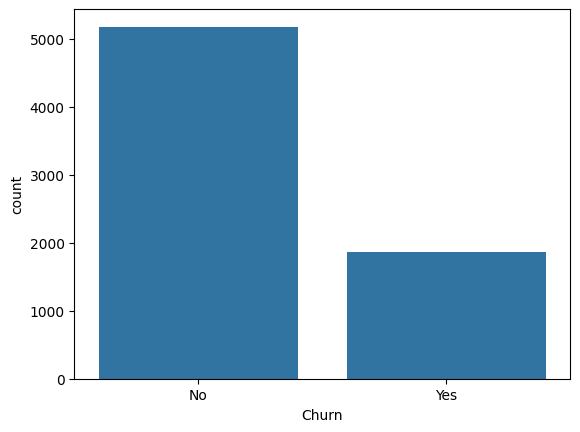

In [131]:
sns.countplot(x='Churn', data=data)

Converting the churn class into a binary class.
0: Representing normal(Not churned)
1: Representing churn.

In [132]:
data['Churn'] =data['Churn'].map({'Yes':1, 'No':0})

In [133]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [134]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


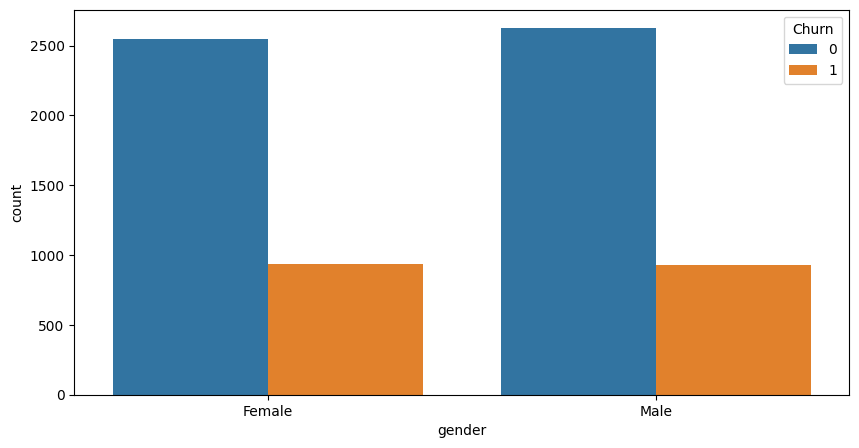

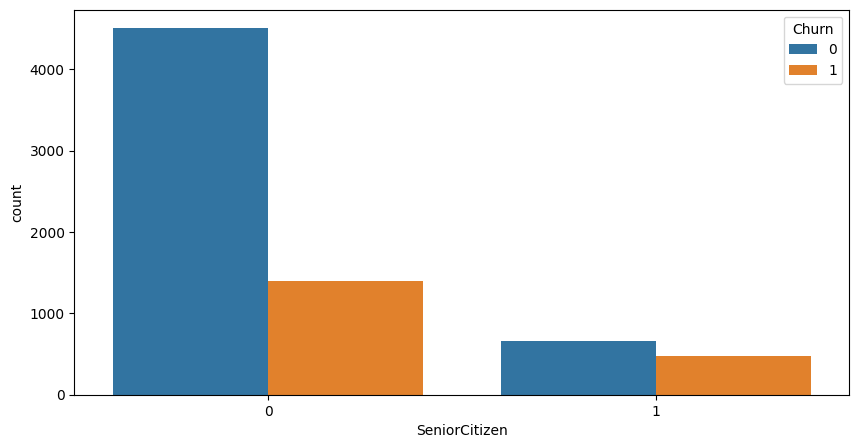

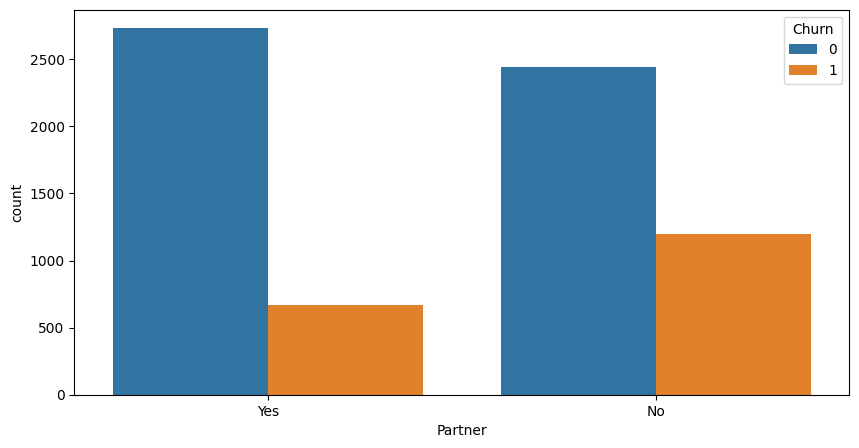

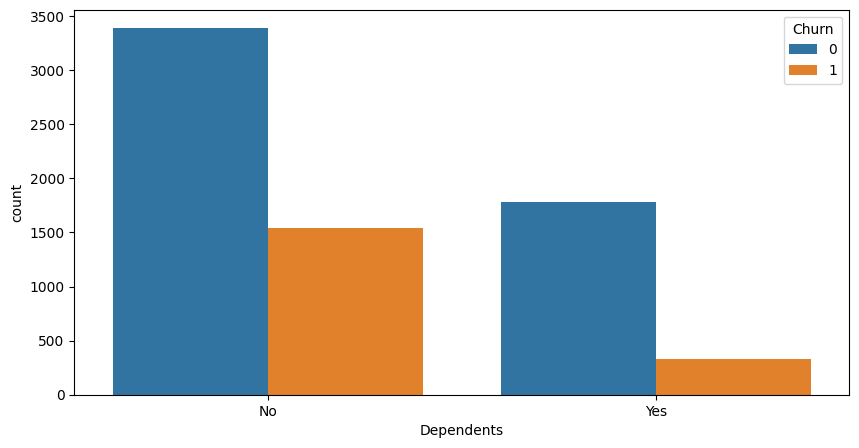

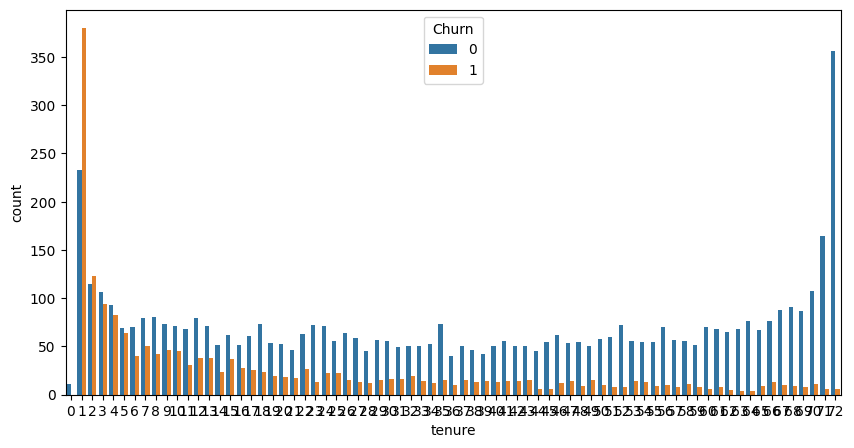

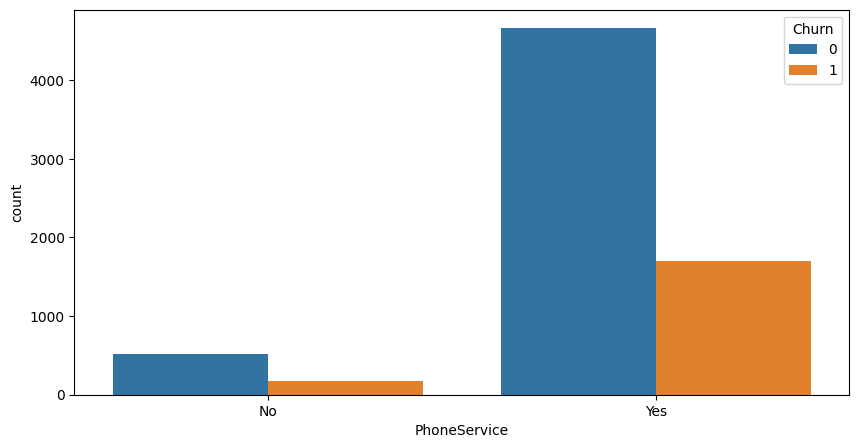

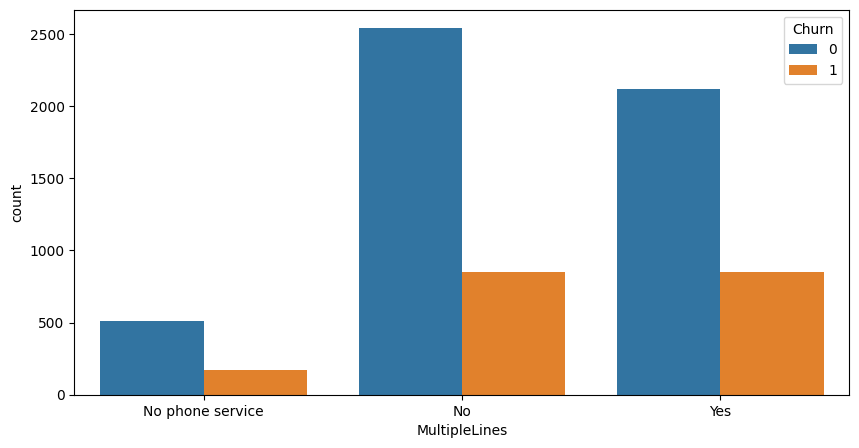

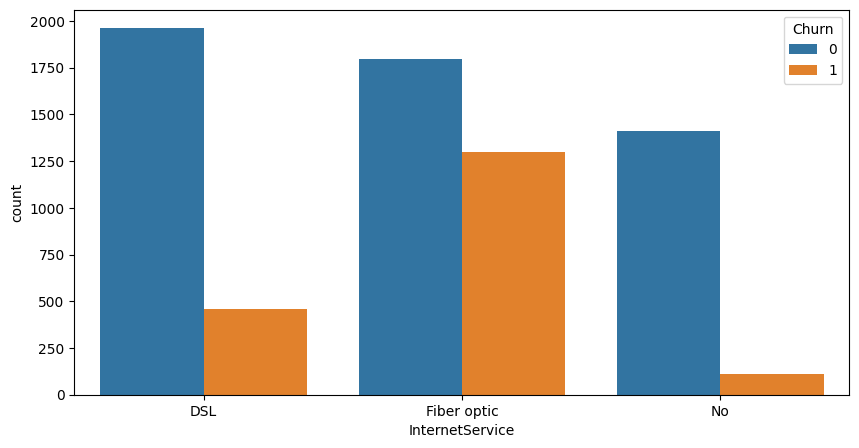

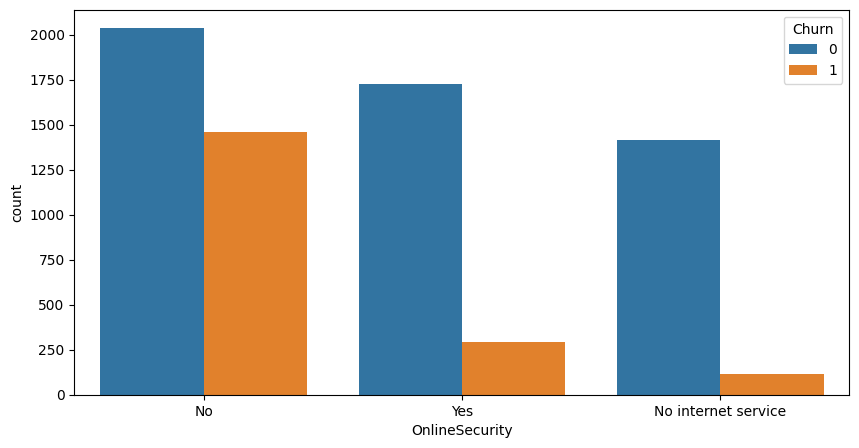

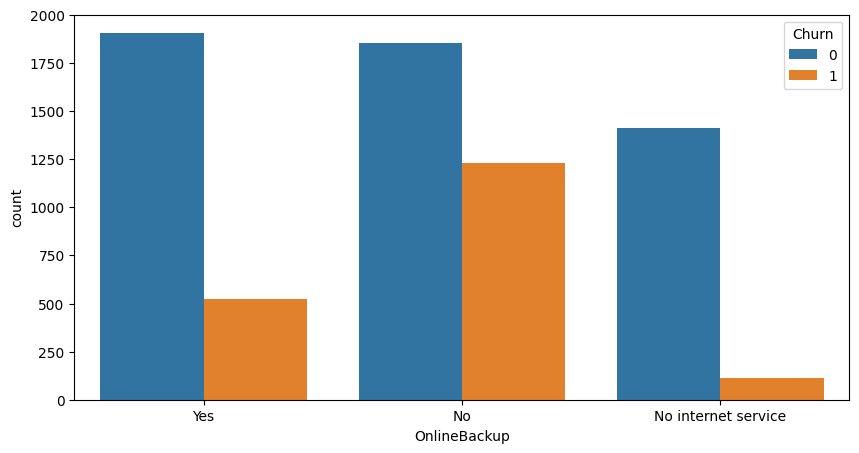

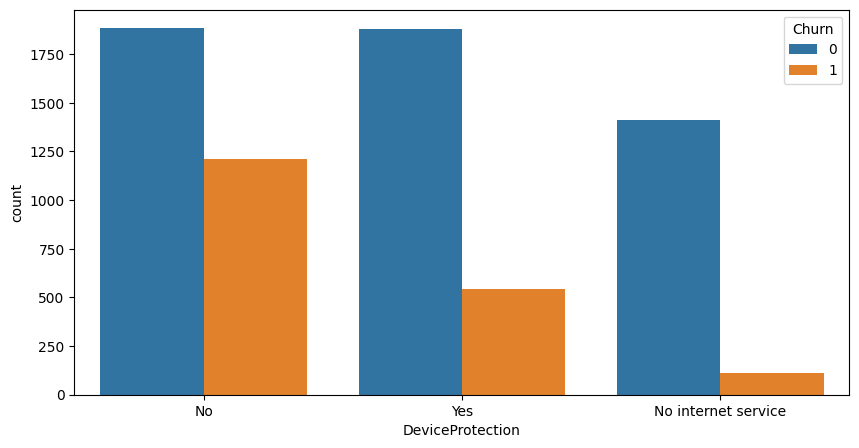

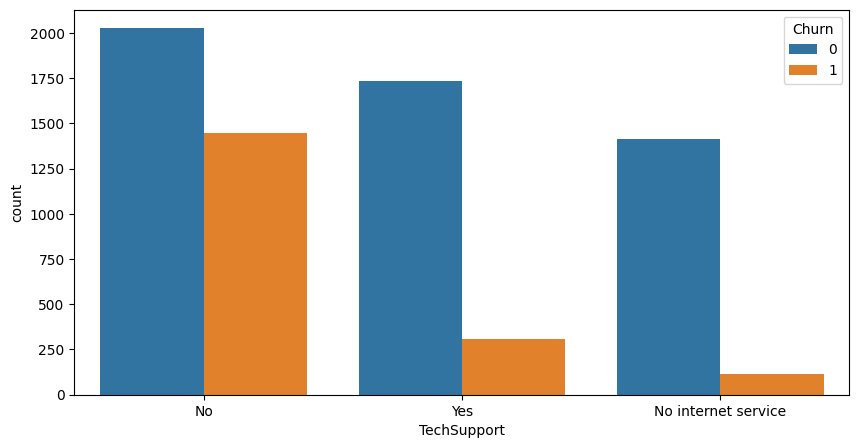

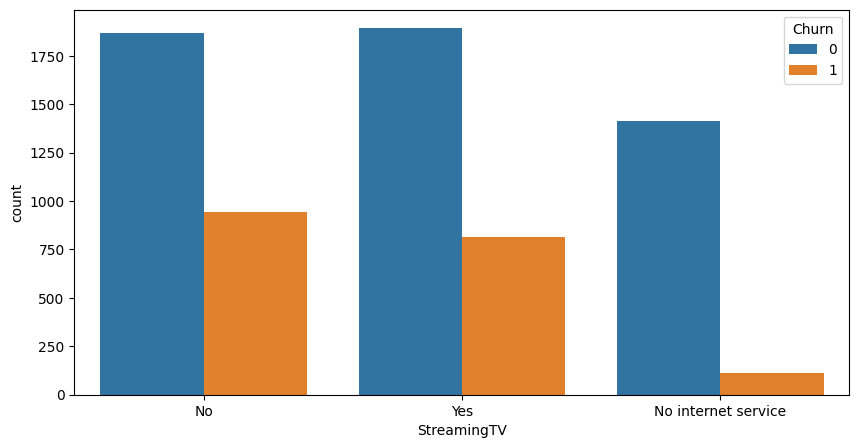

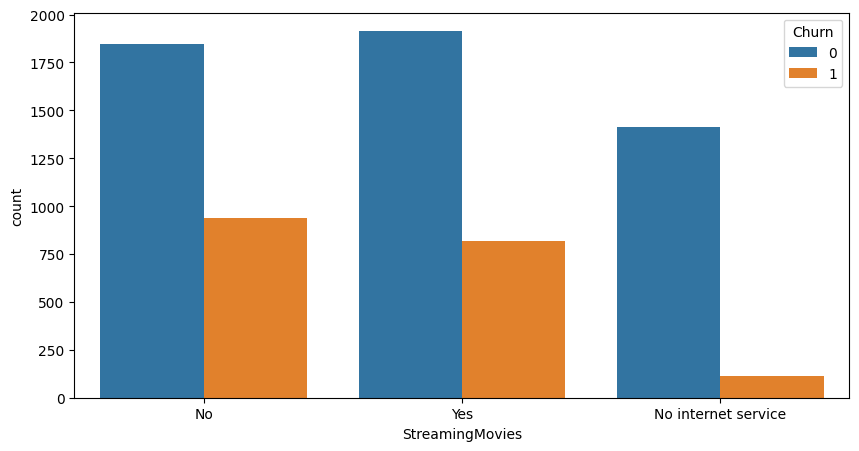

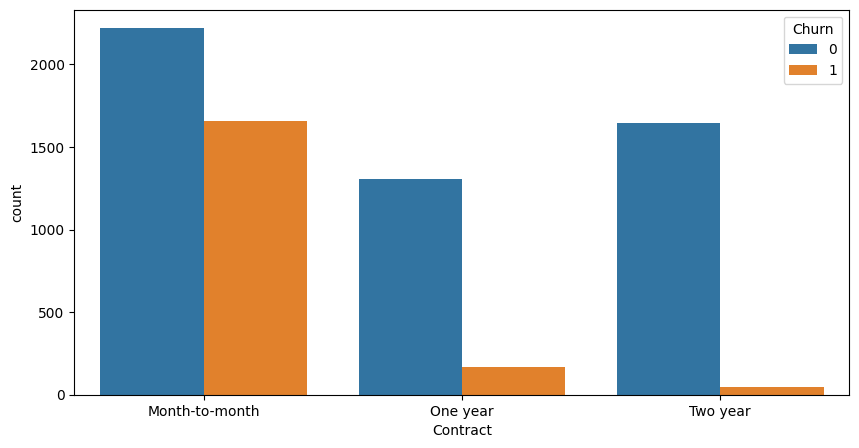

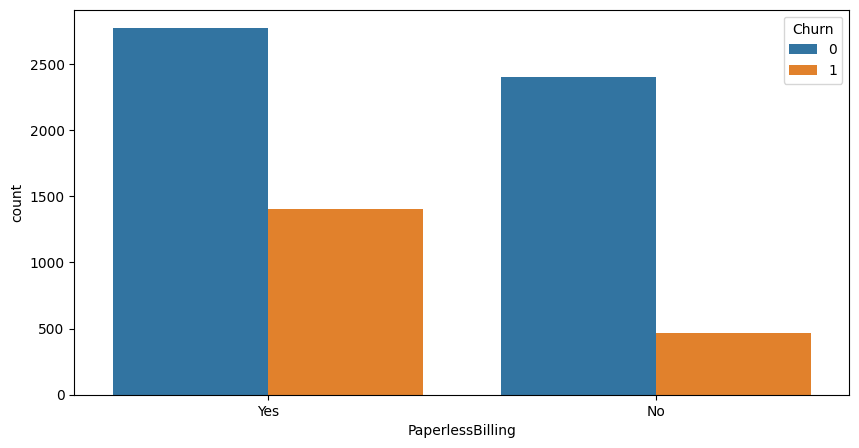

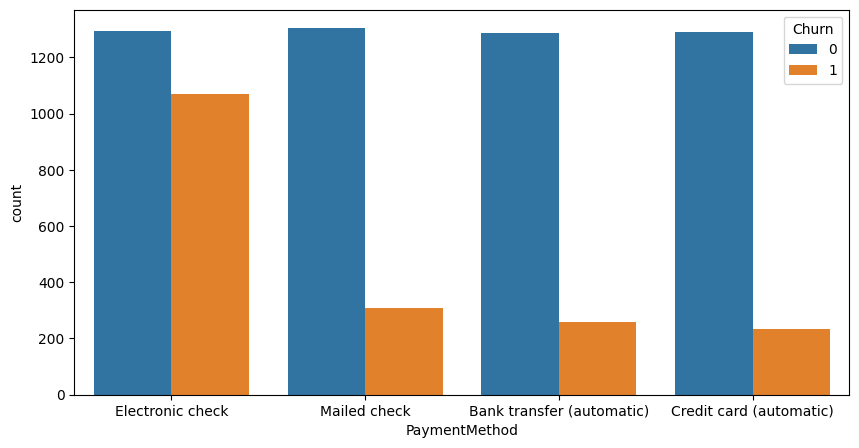

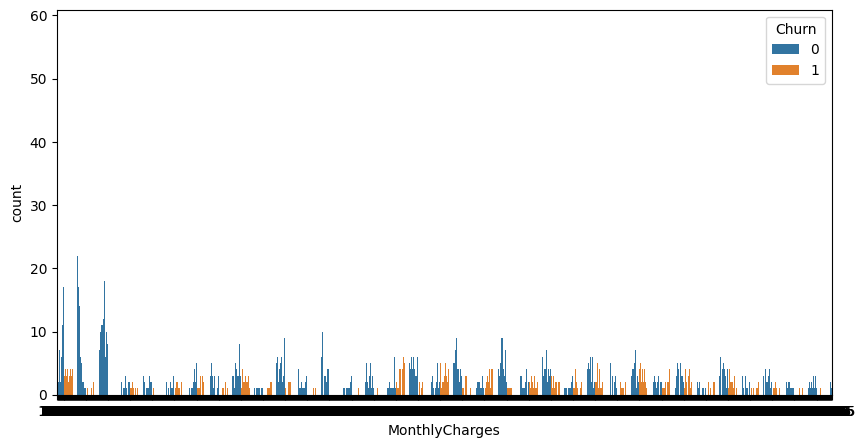

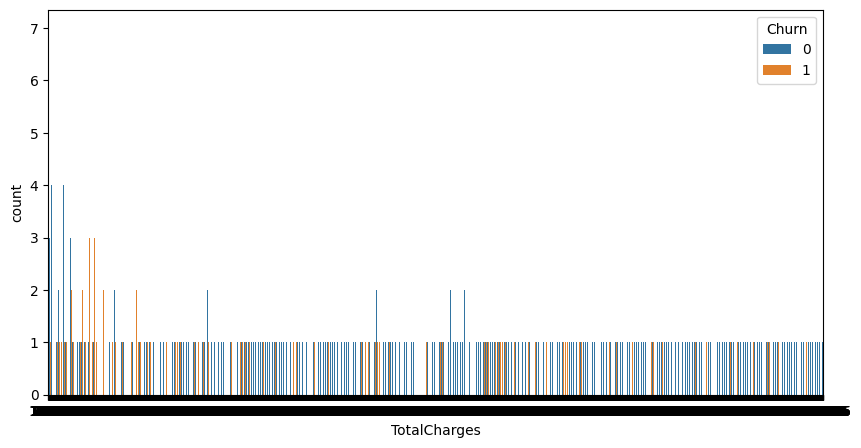

In [135]:
temp_data = data.drop('customerID', axis=1)
for feat in temp_data.columns:
  if feat !='Churn':
    plt.figure(figsize=(10,5))
    sns.countplot(x=feat,hue='Churn', data=temp_data)


<Axes: >

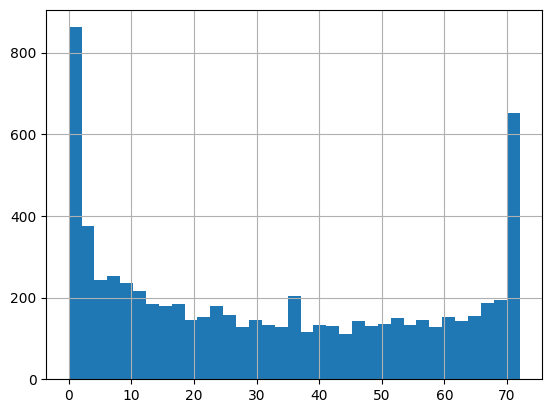

In [136]:
data['tenure'].hist(bins=35)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

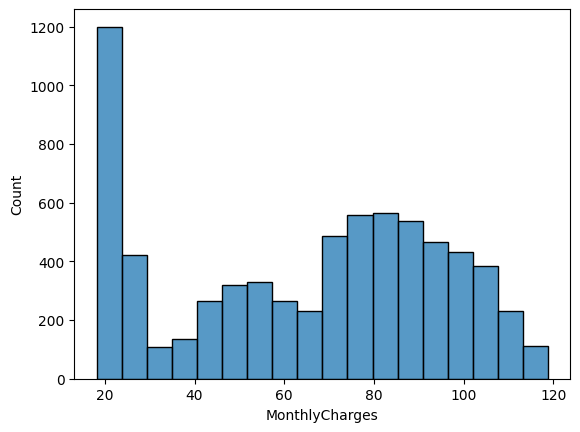

In [137]:
sns.histplot(data['MonthlyCharges'])

<Axes: xlabel='StreamingTV', ylabel='count'>

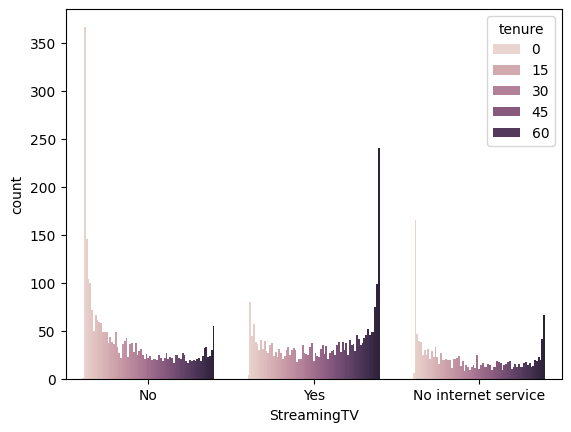

In [138]:
sns.countplot(x='StreamingTV',data=data, hue='tenure')

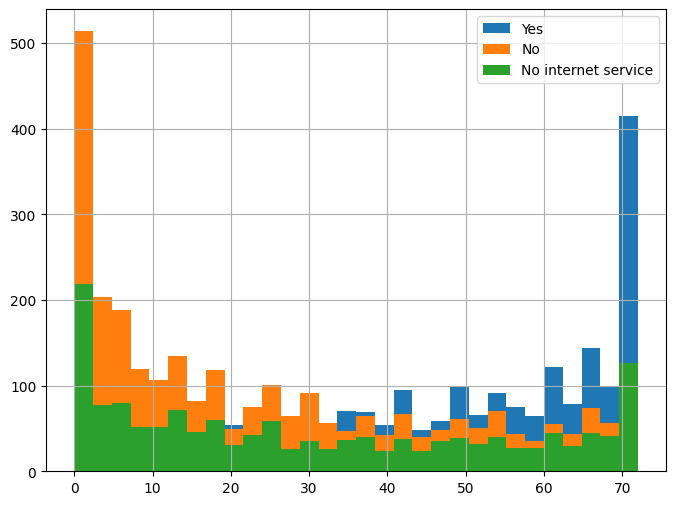

In [139]:
plt.figure(figsize=(8,6))
data[data['StreamingTV']=='Yes']['tenure'].hist(bins=30)
data[data['StreamingTV']=='No']['tenure'].hist(bins=30)
data[data['StreamingTV']=='No internet service']['tenure'].hist(bins=30)
plt.legend(['Yes', 'No', 'No internet service'])

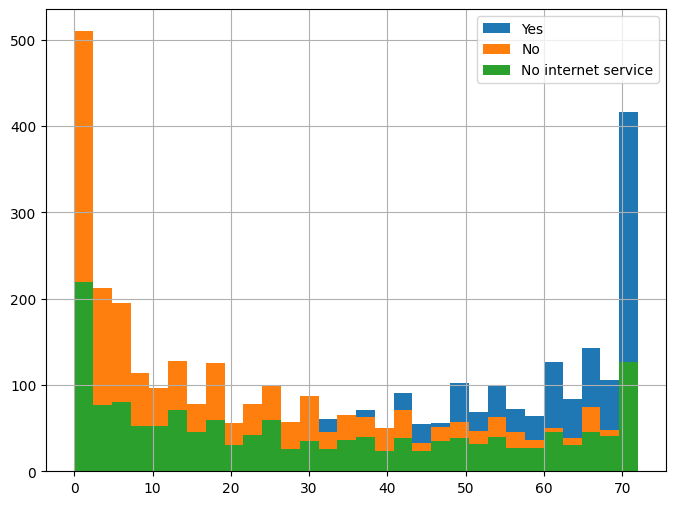

In [140]:
plt.figure(figsize=(8,6))
data[data['StreamingMovies']=='Yes']['tenure'].hist(bins=30)
data[data['StreamingMovies']=='No']['tenure'].hist(bins=30)
data[data['StreamingMovies']=='No internet service']['tenure'].hist(bins=30)
plt.legend(['Yes', 'No', 'No internet service'])

<Axes: xlabel='StreamingMovies', ylabel='count'>

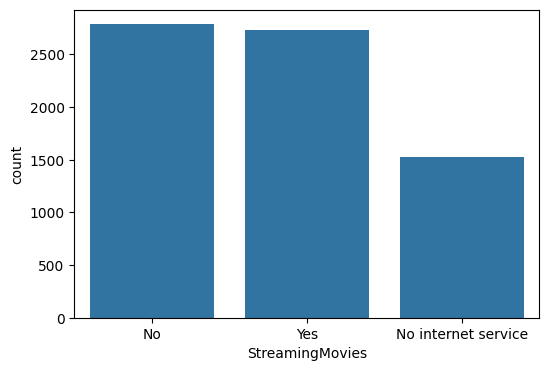

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingMovies', data=data)

<Axes: xlabel='StreamingTV', ylabel='count'>

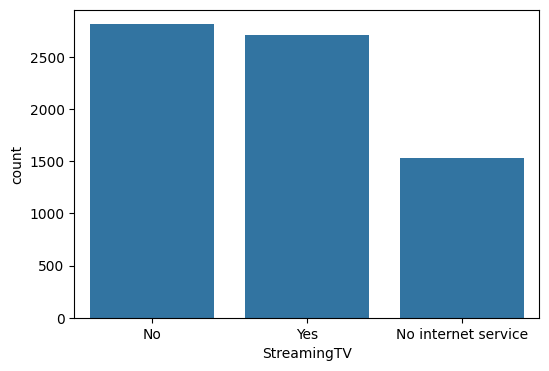

In [142]:
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingTV', data=data)

In [143]:
ls = ['StreamingTV', 'StreamingMovies']
for feat in ls:
  print(data[feat].value_counts())
  print('\n')

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64




<Axes: >

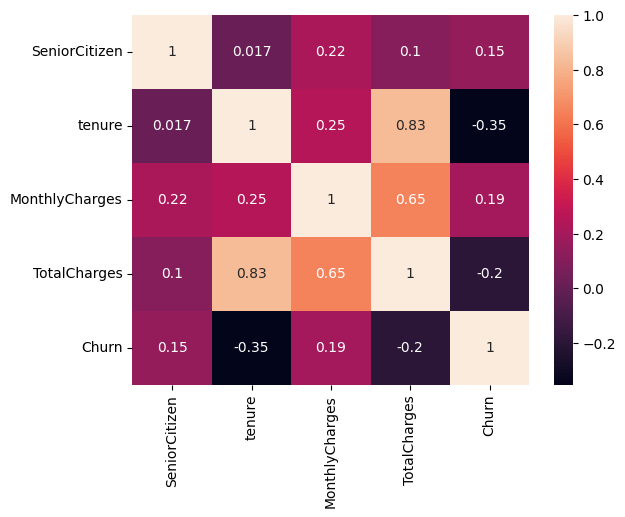

In [144]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

<Axes: xlabel='tenure', ylabel='TotalCharges'>

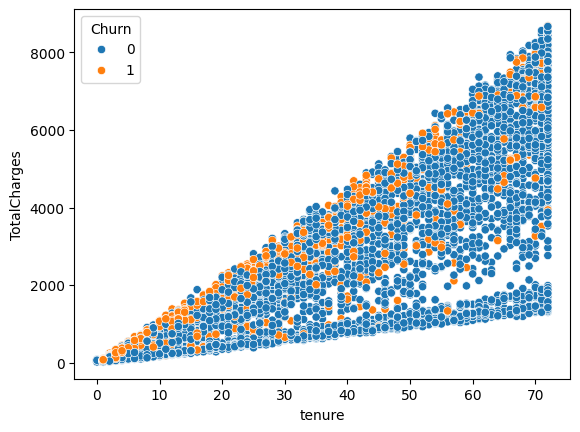

In [145]:
#Totalcharges and monthly charges have a positive correlation
#Tenure and total charges have a positive correlation
#To do a scatterplot to investigate the relationship between these features
sns.scatterplot(x='tenure', y='TotalCharges', data=data, hue='Churn')

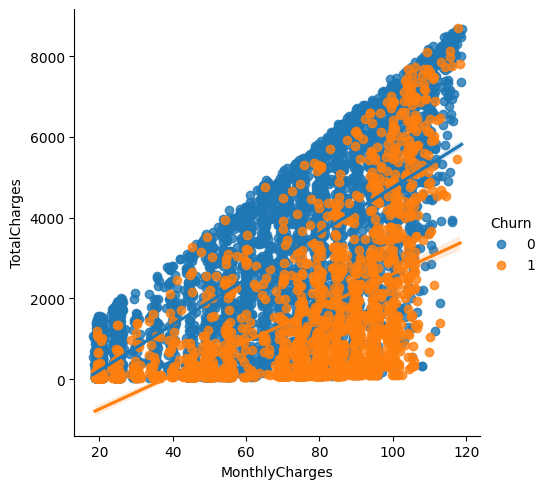

In [146]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=data, hue='Churn')

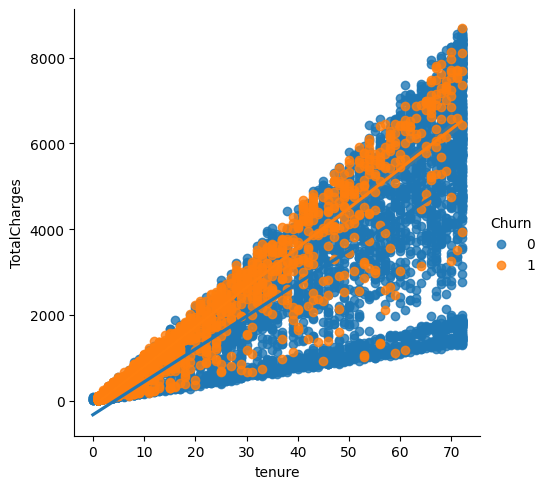

In [147]:
sns.lmplot(x='tenure', y='TotalCharges', data=data, hue='Churn')

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
y= data['Churn']
X = data.drop(['Churn', 'customerID'], axis=1)

In [150]:
pre_X_train, pre_X_test, pre_y_train, pre_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


Building a preprocessing pipeline


In [152]:
categorical_feat = data.drop(['customerID','Churn'], axis=1).select_dtypes(include='object').columns.tolist()
numeric_feat = data.drop(['customerID','Churn'], axis=1).select_dtypes(include='number').columns.tolist()

In [153]:
categorical_feat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [154]:
data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [155]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


In [156]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [157]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_feat),
    ('cat', cat_transformer, categorical_feat)

])

In [158]:
pre_pipe = Pipeline([
    ('preprocessor', preprocessor)
])

In [159]:
pre_X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1695,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,70.70,3770.00
1095,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55
3889,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,259.65
3667,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45
2902,Female,1,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90


In [160]:
pre_pipe.fit(pre_X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])]))])

In [161]:
pre_X_train = pre_pipe.transform(pre_X_train)
pre_X_test = pre_pipe.transform(pre_X_test)

In [162]:
pre_X_train = pd.DataFrame(pre_X_train,columns= pre_pipe.named_steps['preprocessor'].get_feature_names_out())
pre_X_test = pd.DataFrame(pre_X_test,columns= pre_pipe.named_steps['preprocessor'].get_feature_names_out())

In [163]:
pre_X_train.head(1)

,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,...,cat__StreamingMovies_Yes,cat__Contract_Month-to-month,cat__Contract_One year,cat__Contract_Two year,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check
0,-0.436831,0.881078,0.195927,0.654495,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [164]:
#sns.pairplot(pre_X_train)

<Axes: >

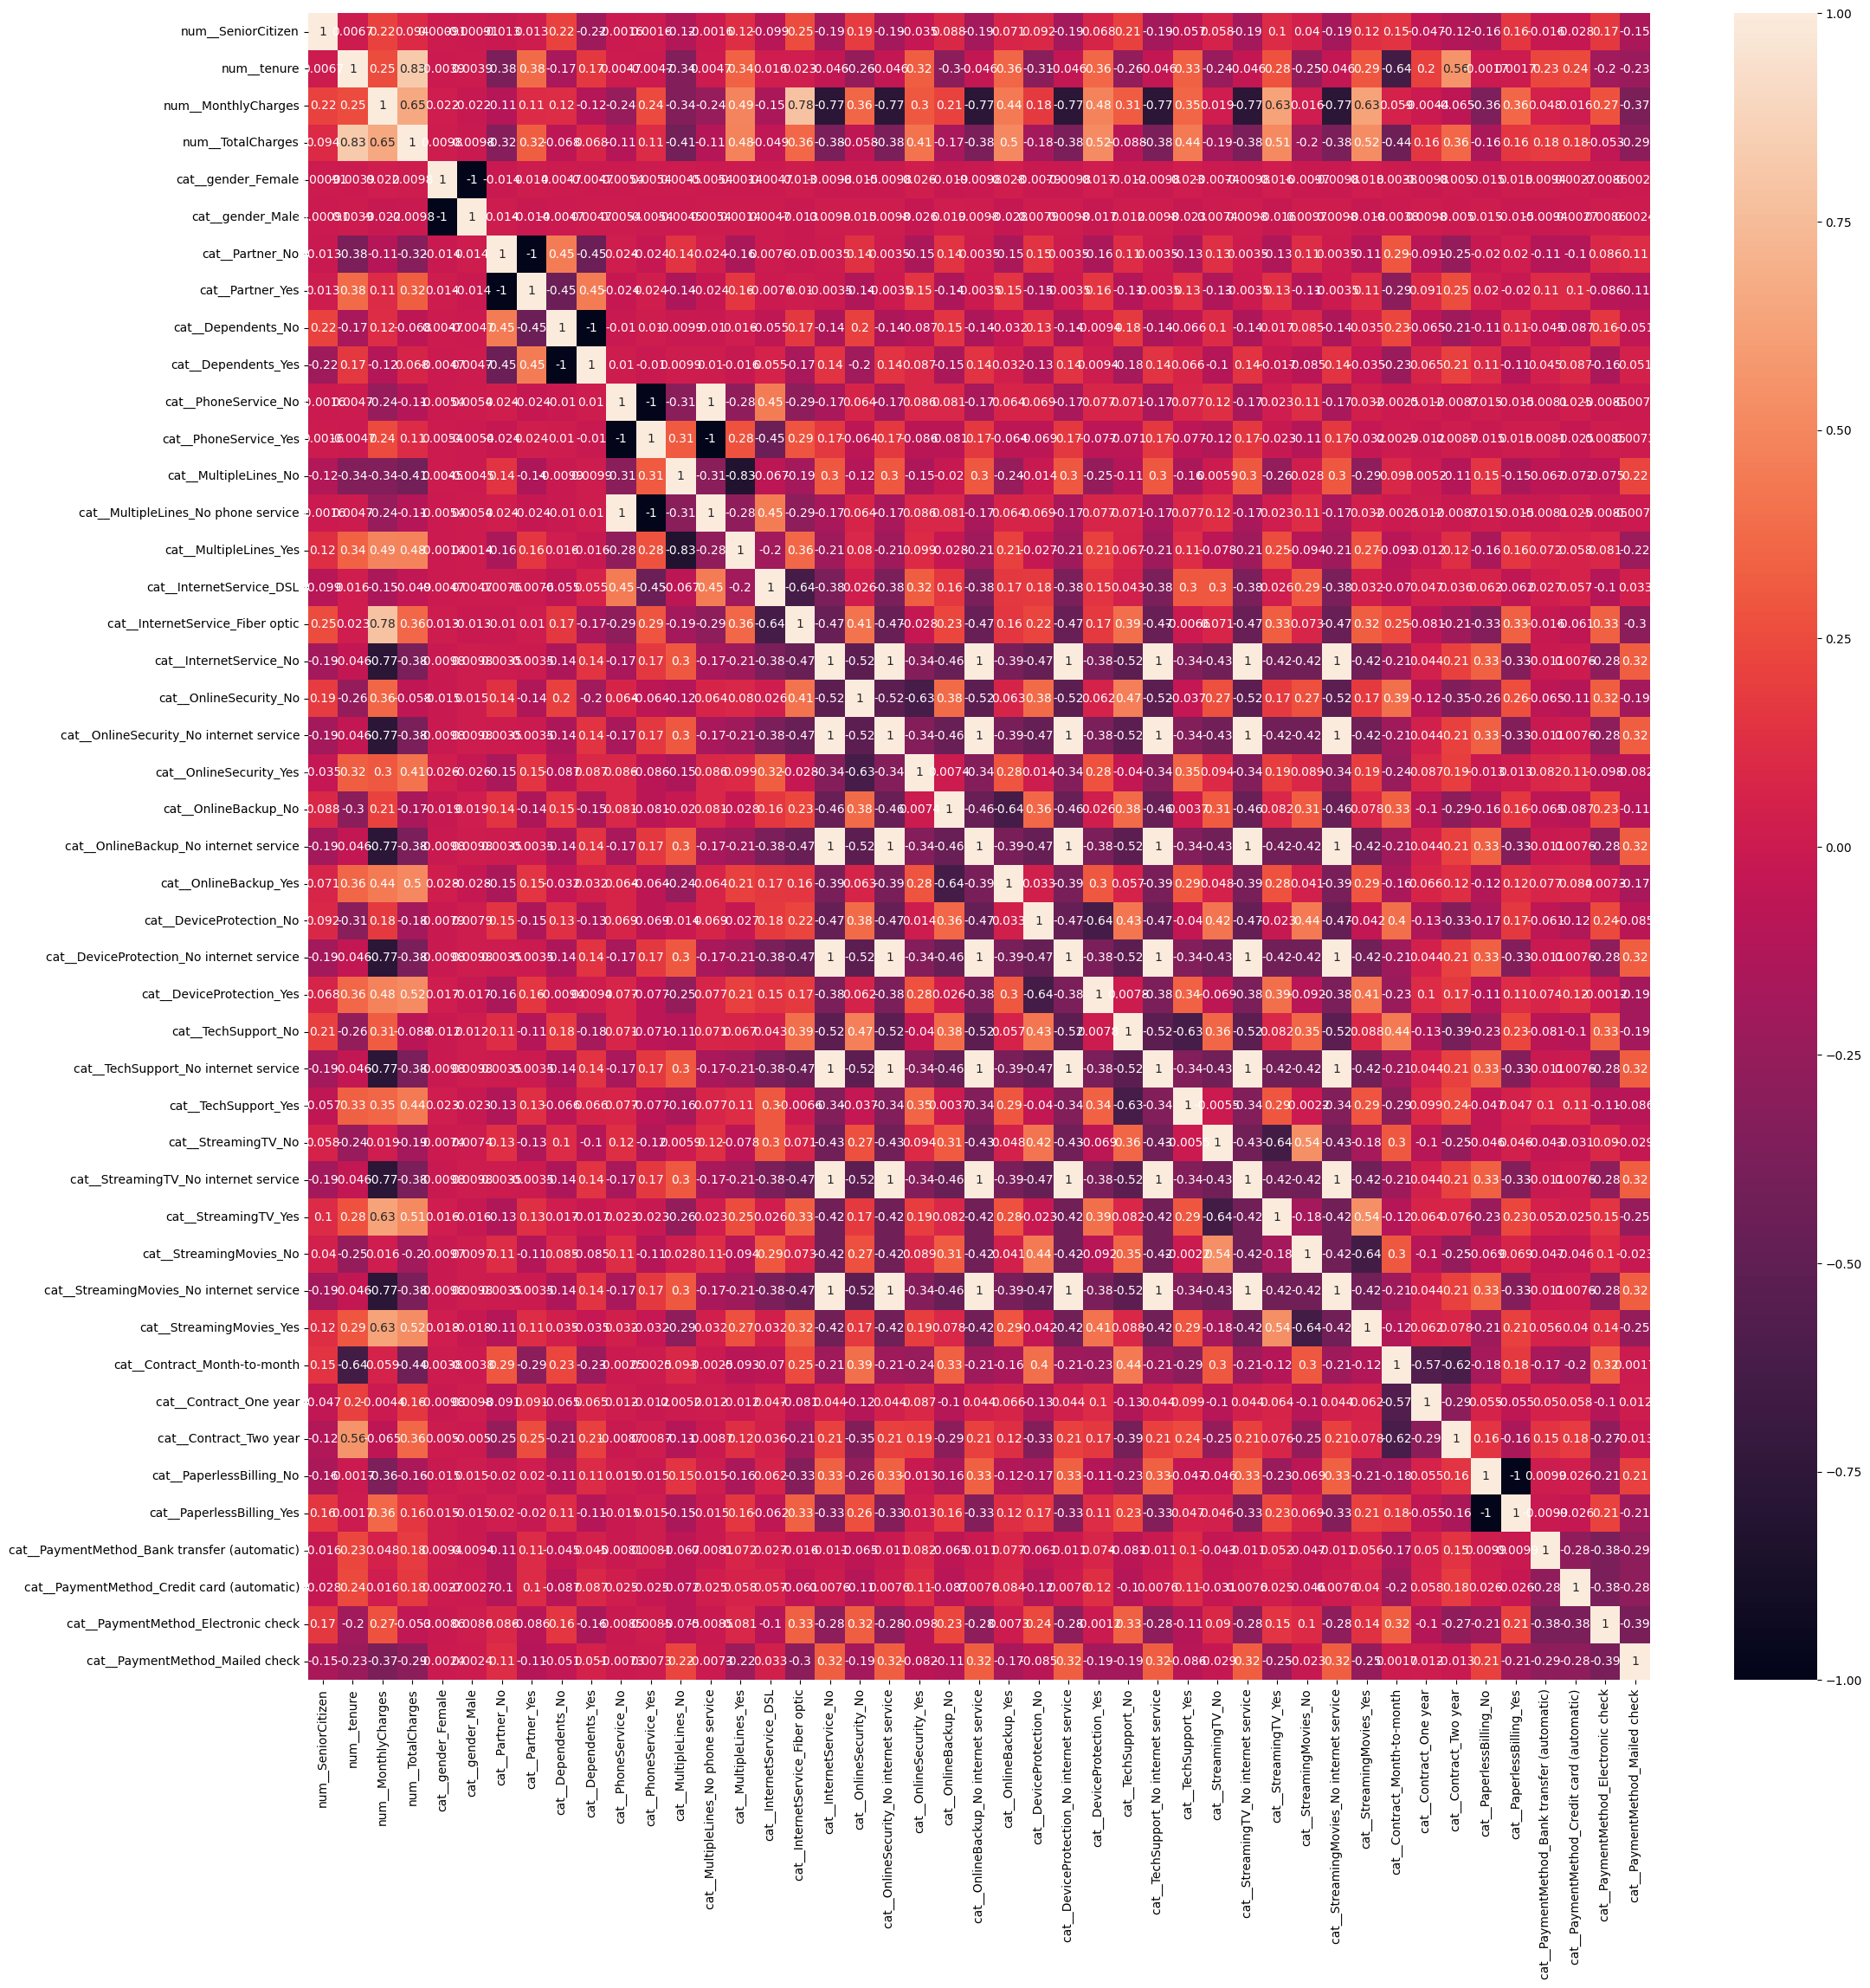

In [165]:
plt.figure(figsize=(25,25))
corrmat = pre_X_train.corr()
sns.heatmap(corrmat, annot=True)

Ideallly the correlation heatmap should show a strong correlation with the target feature and the feature with itself(Among the diagonal). In the above there is strong correlation amongst features breaking the previously mentioned criterion

In [166]:
%pip install feature-engine

In [167]:
from feature_engine.selection import SmartCorrelatedSelection, DropConstantFeatures, DropDuplicateFeatures

In [168]:
feat_pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicate', DropDuplicateFeatures()),
    ('correlated', SmartCorrelatedSelection(threshold=0.8,selection_method='variance' ))
])

In [169]:
feat_pipe.fit(pre_X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicate', DropDuplicateFeatures()),
                ('correlated',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [170]:
feat_pipe.named_steps['duplicate'].features_to_drop_

{'cat__DeviceProtection_No internet service',
 'cat__MultipleLines_No phone service',
 'cat__OnlineBackup_No internet service',
 'cat__OnlineSecurity_No internet service',
 'cat__StreamingMovies_No internet service',
 'cat__StreamingTV_No internet service',
 'cat__TechSupport_No internet service'}

In [171]:
corr_feat =feat_pipe.named_steps['correlated'].correlated_feature_sets_

In [175]:
corr_feat

[{'num__TotalCharges', 'num__tenure'},
 {'cat__Partner_No', 'cat__Partner_Yes'},
 {'cat__gender_Female', 'cat__gender_Male'},
 {'cat__MultipleLines_No', 'cat__MultipleLines_Yes'},
 {'cat__PaperlessBilling_No', 'cat__PaperlessBilling_Yes'},
 {'cat__Dependents_No', 'cat__Dependents_Yes'},
 {'cat__PhoneService_No', 'cat__PhoneService_Yes'}]

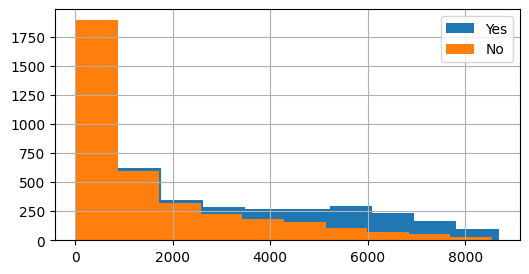

In [186]:
plt.figure(figsize=(6,3))
data[data['Partner']=='Yes']['TotalCharges'].hist(bins=10)
data[data['Partner']=='No']['TotalCharges'].hist(bins=10)
plt.legend(['Yes', 'No'])

<Axes: xlabel='Partner', ylabel='count'>

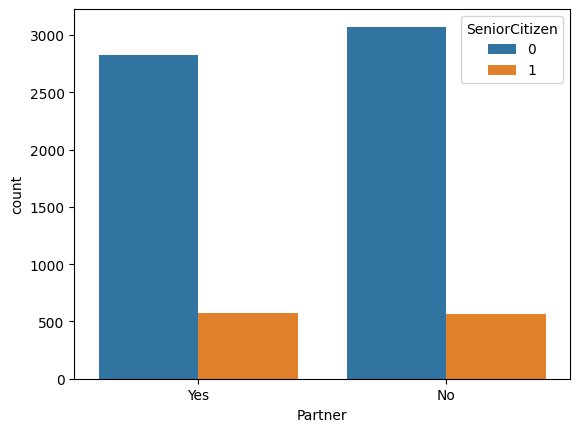

In [192]:
sns.countplot(x='Partner', data=data, hue='SeniorCitizen')

<Axes: xlabel='Partner', ylabel='count'>

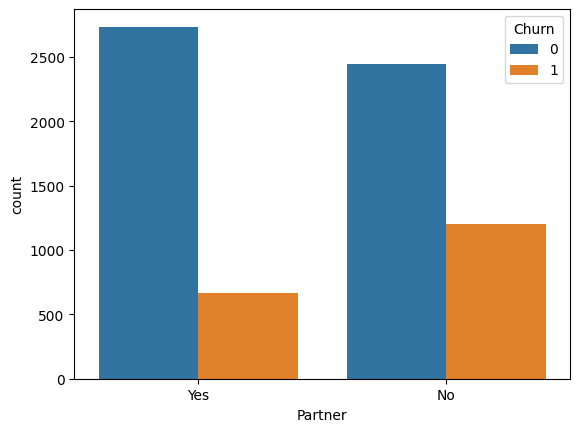

In [193]:
sns.countplot(x='Partner', data=data, hue='Churn')

<Axes: xlabel='gender', ylabel='count'>

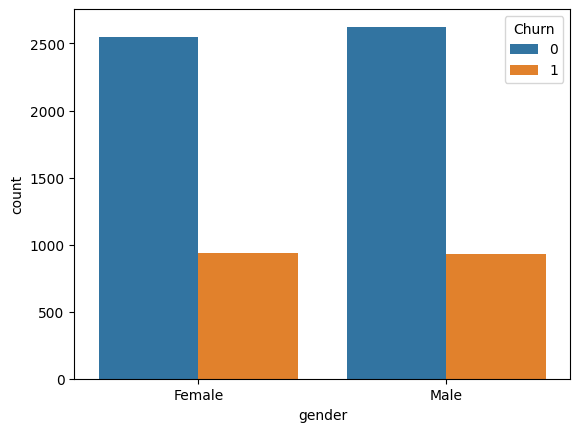

In [191]:
sns.countplot(x='gender', data=data, hue='Churn')

In [205]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


Investigating the Correlation between male and female gender in this dataset

In [211]:
num_of_female_no = len(data[(data['gender']=='Female') & (data['Churn']==0)])
num_of_female_yes = len(data[(data['gender']=='Female') & (data['Churn']==1)])
num_of_male_no = len(data[(data['gender']=='Male') & (data['Churn']==0)])
num_of_male_yes = len(data[(data['gender']=='Male') & (data['Churn']==1)])
female = len(data[data['gender']=='Female'])
male = len(data[data['gender']=='Male'])

print('Number of females who have not churned: {}'.format(num_of_female_no /female))
print('Number of males who have not churned: {}'.format(num_of_male_no /male))
print('Number of females who have churned: {}'.format(num_of_female_yes /female ))
print('Number of males who have churned: {}'.format(num_of_male_yes /male))

Number of females who have not churned: 0.7307912844036697
Number of males who have not churned: 0.7383966244725738
Number of females who have churned: 0.26920871559633025
Number of males who have churned: 0.2616033755274262


<Axes: xlabel='Dependents', ylabel='count'>

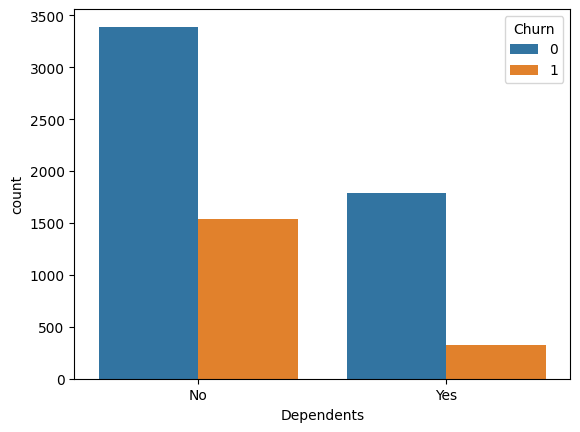

In [199]:
sns.countplot(x='Dependents', data=data, hue='Churn')

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>],
       [<Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

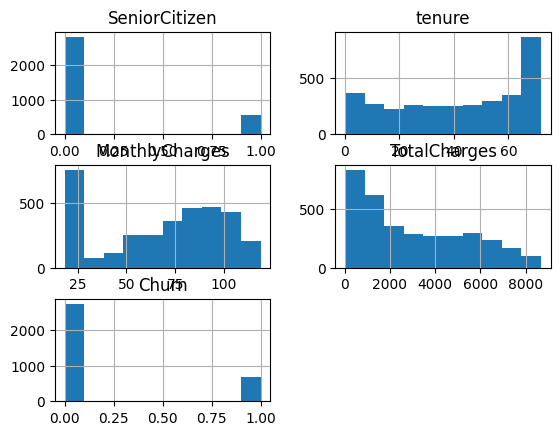

In [180]:
data[data['Partner']=='Yes'].hist()

In [ ]:
pre_X_train = feat_pipe.transform(pre_X_train)
pre_X_test = feat_pipe.transform(pre_X_test)

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(pre_X_train.corr(), annot=True)

In [ ]:
#sns.pairplot(pre_X_train)

In [ ]:
#Investigating the relationship of each feature to the
demo = pd.concat([pre_X_train,pre_y_train],axis=1)
demo.corr()['Churn']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop =EarlyStopping(monitor='val_loss', verbose=0, mode='min', patience=5)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(pre_X_train, pre_y_train, epochs=100,batch_size=128 ,validation_data=(pre_X_test, pre_y_test), callbacks=[early_stop])

In [ ]:
model_history = pd.DataFrame(model.history.history)

In [ ]:
model_history.head(5)

In [ ]:
model_history.plot()

In [ ]:
model.evaluate(pre_X_test, pre_y_test)

In [ ]:
y_pred =model.predict(pre_X_test)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted Y'])

In [ ]:
y_pred['Predicted Y'] = y_pred['Predicted Y'].apply(lambda x: 1 if x >=0.5 else 0)

In [ ]:
y_df = pd.concat([y_pred, pre_y_test], axis=1)

In [ ]:
pre_y_test.isna().sum()

In [ ]:
y_pred.isna().sum()

In [ ]:
y_df.columns=['Predicted Y', 'True Y']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pre_y_test, y_pred['Predicted Y']))
print('\n')
print(confusion_matrix(pre_y_test, y_pred['Predicted Y']))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg_model = Pipeline(
    steps=[("preprocessor", preprocessor), ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicate', DropDuplicateFeatures()),
    ('correlated', SmartCorrelatedSelection(threshold=0.8,selection_method='variance' )),
     ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_model.fit(X_train, y_train)
print("model score: %.3f" % reg_model.score(X_test, y_test))

In [ ]:
reg_y =pd.DataFrame(reg_model.predict(X_test), columns=['Predicted Y'])

In [ ]:
print(classification_report(y_test, reg_y['Predicted Y']))
print('\n')
print(confusion_matrix(y_test, reg_y['Predicted Y']))

In [ ]:
pred_df = pd.concat([reg_y, y_test], axis=1)
pred_df.columns=['Predicted Y', 'True Y']